Matt Griffiths - V00752005

<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 5

## Q1: Distribution of power spectral estimates

<div style='background:#F0F0F0'>**1** You **may** use `matplotlib.mlab.psd` for the following question, but you had best use it correctly!

Using normally distributed random noise time series of length $N=2048$, show using a Monte Carlo analysis and by comparison to the theoretical probability distribution functions that:  
</div>

   1. The raw spectral estimate is indeed distributed as $\chi^2_2$.
   2. Show that block averaging with no overlap is distributed as $\chi^2_{2N_{blocks}}$.
   3. Show that block averaging with 50% overlap Hanning windows is distributed as $\chi^2_{2N_{blocks}}$.

<div style='background:#F0F0F0'>You can choose your block length, but making it an integer divisor of 2048 will make your life a lot easier.  Show that as $N_{blocks}$ is increased the variance drops (i.e. the distribution of the spectral estimates gets tighter).</div>


<div style='background:#F0F0F0'>HINT: for this time series the individual frequency estimates are indipendent samples of the distribution, so you can use them in compiling your distributions.</div>

<div style='background:#F0F0F0'>HINT: To get the pdf of the $\chi^2_\nu$ distribution correct, you need to "scale" by $\nu^{-1}$ where $\nu$ are the degrees of freedom.</div>

<div style='background:#F0F0F0'>HINT: for good presentation, make your histograms have the same bin sizes, and compare the distributions for all three cases on the same plot.</div>

In [1]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
%matplotlib inline

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


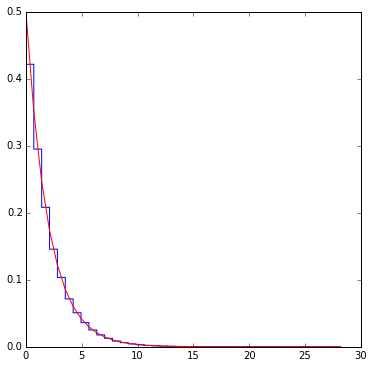

In [2]:
def fft(x):
    T = x.size
    XfC = np.fft.fft(x)
    fC = np.fft.fftfreq(x.size, 1)
    Sxx = XfC*np.conjugate(XfC)/T
    return fC, XfC, Sxx

times = 1000
N = 2048
a = np.random.randn(N)
f, x, b = fft(a)
NFmat = np.zeros((times, f.size))

for i in range(0,times,1):
    noise = np.random.randn(N)
    NSF = fft(noise)[2]
    NFmat[i] = NSF
    
NFT = np.transpose(NFmat)
NFF = np.zeros(f.size)
NFTflat = NFT.flatten()

fig,ax = plt.subplots(1,1,figsize=(6,6))
nn,bins,pp = ax.hist(NFTflat*2,40,normed=True, histtype='step')
chi=stats.chi2.pdf(bins,df=2,)
ax.plot(bins,chi,'r')
plt.legend(loc=1)

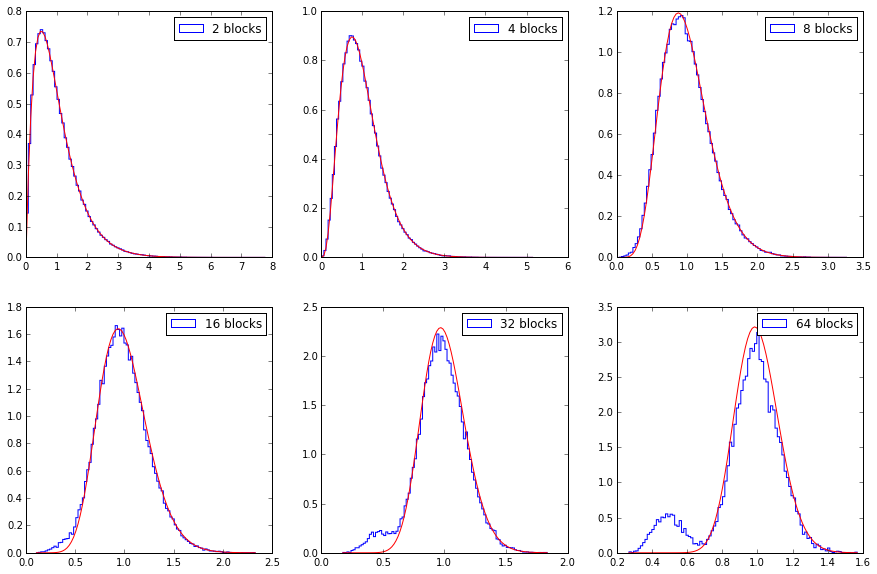

In [3]:
blocks = [2, 4, 8, 16, 32, 64]
figN = math.ceil(math.sqrt(len(blocks)))
fig = plt.figure(figsize=(15,15))
N = 2048
times = 1000

for n, bb in enumerate(blocks):
    blen = N/bb
    Gmat = np.zeros((times, 1 + blen/2))
    for i in range(times):
        a = np.random.randn(N)
        FA = mlab.psd(a, NFFT=blen, noverlap=0, window=mlab.window_none, sides='onesided')
        Gmat[i] = FA[0]
    Gx = Gmat.flatten()
    la = str(bb) + " blocks"
    ax = plt.subplot(figN, figN, n+1)
    nn,bins,pp = ax.hist(Gx,100,normed=True, histtype='step', label=la)
    chi=stats.chi2.pdf(bins,df=2*bb, scale=(1./(2*bb)))
    plt.plot(bins,chi,'r')
    plt.legend(loc=1)

Yeah, those look pretty nice, there is this strange blip forming for high numbers of blocks on the histogram, likely attributed to leakage.

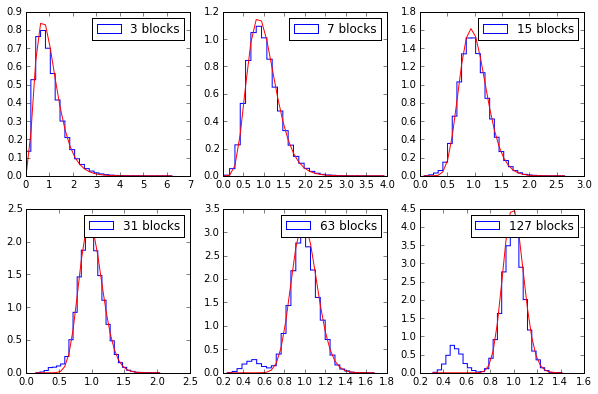

In [4]:
fig = plt.figure(figsize=(10,10))
for n, bb in enumerate(blocks):
    blen = N/bb
    Gmat = np.zeros((times, 1 + blen/2))
    for i in range(times):
        a = np.random.randn(N)
        FA = mlab.psd(a, NFFT=blen, noverlap= blen/2, window=mlab.window_hanning, sides='onesided')
        Gmat[i] = FA[0]
    Gx = Gmat.flatten()
    la = str(2*bb - 1) + " blocks"
    ax = plt.subplot(figN, figN, n+1)
    nn,bins,pp = ax.hist(Gx,30,normed=True, histtype='step', label=la)
    chi=stats.chi2.pdf(bins,df=2*bb*2 -1, scale=(1./(2*bb*2 - 1)))
    plt.plot(bins,chi,'r')
    plt.legend(loc=1)

<div style='background:#F0F0F0'>**2**  For the Hanning window estimate, what fits better: $2N_{blocks}$ degrees of freedom or $18N_{blocks}/11$ degrees of freedom (the correct theoretical value)?  Its OK to evaluate by eye.</div>

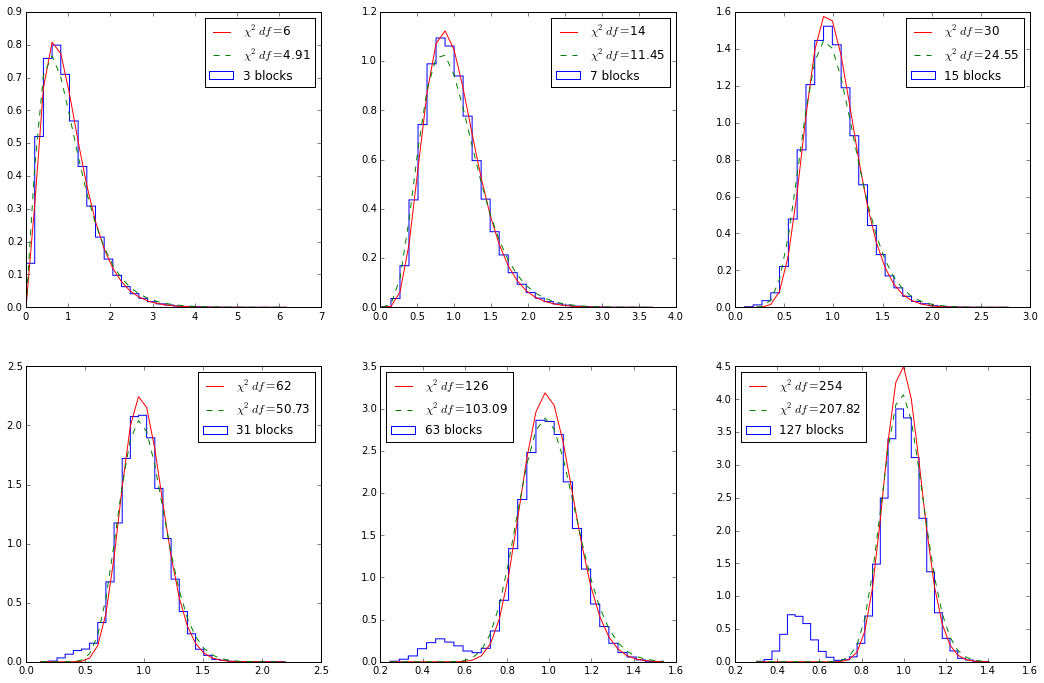

In [5]:
fig = plt.figure(figsize=(18,18))
for n, bb in enumerate(blocks):
    blen = N/bb
    nb = 2*bb - 1
    ovdf = 2*nb
    thdf = 18.*nb/11.
    Gmat = np.zeros((times, 1 + blen/2))
    for i in range(times):
        a = np.random.randn(N)
        FA = mlab.psd(a, NFFT=blen, noverlap= blen/2, window=mlab.window_hanning, sides='onesided')
        Gmat[i] = FA[0]
    Gx = Gmat.flatten()
    la = str(2*bb - 1) + " blocks"
    ax = plt.subplot(figN, figN, n+1)
    nn,bins,pp = ax.hist(Gx,30,normed=True, histtype='step', label=la)
    chi=stats.chi2.pdf(bins,df=ovdf, scale=(1./ovdf))
    chicken = stats.chi2.pdf(bins, df=thdf, scale=(1./thdf))
    la1 = "$\chi^2 df = $" +str(ovdf)
    plt.plot(bins,chi,'r', label=la1)
    la2 = "$\chi^2 df = $" + "%0.2f" %thdf
    plt.plot(bins,chicken, 'g--', label=la2)
    if(n>3): plt.legend(loc=0)
    else: plt.legend(loc=1)

For large numbers of blocks, the theoretical value for degrees of freedom matches the histograms more closely. For small number of blocks, the 2N degrees of freedom matches more closely.

## Q2: Spectra of a "red-noise" signal

<div style='background:#F0F0F0'> **1** Load in the Deep Cove hourly data, and compute the power spectra using some reasonable value for $N_{FFT}$, and comment on the effect of applying the Hanning window to not applying it to the spectral leakage.</div>

In [6]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
dc=dc[np.isfinite(dc)]
dc=dc[~np.isnan(dc)]

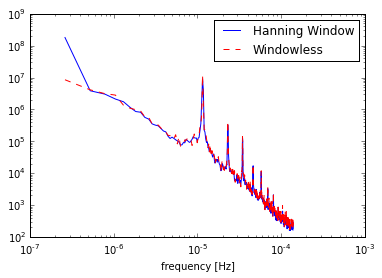

In [32]:
dclen = len(dc)
dt = (1./3600.)
FA = mlab.psd(dc, Fs=dt, NFFT=1059, noverlap=0, window=mlab.window_none, sides='onesided')
FAhan = mlab.psd(dc, Fs=dt, NFFT=1059, noverlap=1059/2, window=mlab.window_hanning, sides='onesided')
plt.loglog(FAhan[1],FAhan[0], label='Hanning Window')
plt.loglog(FA[1],FA[0], 'r--', label='Windowless')
plt.xlabel('frequency [Hz]')
plt.legend(loc=1)

The windowless spectrum doesn't differ all that much from the hanning window spectrum. Even with white noise, the frequency peaks are easily picked out of the spectrum.

<div style='background:#F0F0F0'> **2** Now do the same thing to the intergal of the Deep Cove data with time: $$y(t)=\int_o^t x(t')\ \mathrm{d}t'$$  This is obviously a silly thing to do, but compare the spectra and comment on the difference between the Hanning window and the non-Hanning windowed data.  </div>

variance hanning: 3.62160356205e+16
variance windowless: 7.28209401081e+16


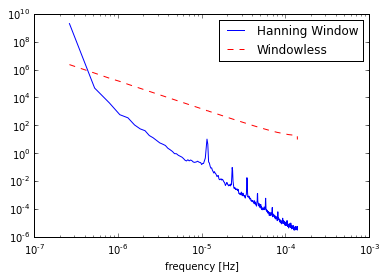

In [36]:
y = np.zeros(len(dc))
for i in range(0, len(dc), 1):
    y[i] = np.sum(dc[0:i+1])*(1./3600.)

Y = mlab.psd(y, Fs=dt, NFFT=1059, noverlap=0, window=mlab.window_none, sides='onesided')
Yhan = mlab.psd(y, Fs=dt, NFFT=1059, noverlap=1059/2, window=mlab.window_hanning, sides='onesided')
plt.loglog(Yhan[1],Yhan[0], label='Hanning Window')
plt.loglog(Y[1],Y[0], 'r--', label='Windowless')
plt.xlabel('frequency [Hz]')
plt.legend(loc=1)

print "variance hanning: " + str(np.var(Yhan[0]))
print "variance windowless: " + str(np.var(Y[0]))

Why that's amazing! Thank you hanning window.
With white noise, the windowing does not make much of a different, the hanning window does not resolve the power spectrum any better than a non-windowed spectrum. But here with red noise, the peak frequencies are completely hidden to the non windowed spectrum, no peaks are resolved. But with the hanning window peaks are clearly resolved, even with the accumulation of noise. Without hanning window, the variance is very low, so that's a nice thing.